In [10]:
# Ocutar linhas de código

import ipywidgets as widgets
from IPython.display import display, HTML
javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}
def toggle_code(state):
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))
def button_action(value):
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
toggle_code(False)

In [ ]:
import codigos_apresentacao

### Tentando encontrar um modelo que represente de forma eficente nivel de correlação entre dois índices

### Como medir nivel de correlação? 

Niveis de correlação podem ser obtidos apartir de curvas, como curva linear, curva de potência, curva polinomial  e curva exponencial, e todas essas curvas podem ser aproximadas com regressões lineares com alterações nas escalas dos dados: 

#### 1. Curva linear  ->   Y = a*X + b

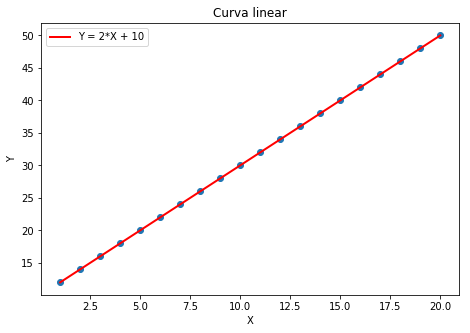

In [2]:
codigos_apresentacao.func1()

#### 2.  Curva exponencial ->  Y = a*log(X) + b

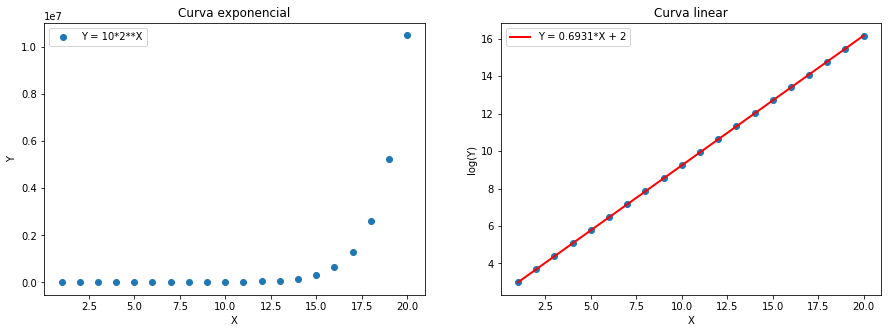

In [3]:
codigos_apresentacao.func2()

#### 3. Curva de potência e curva polinomial -> log(Y) = a*log(X) + b 

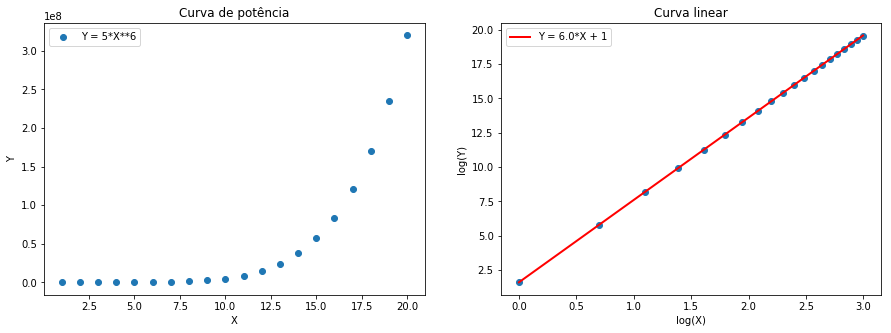

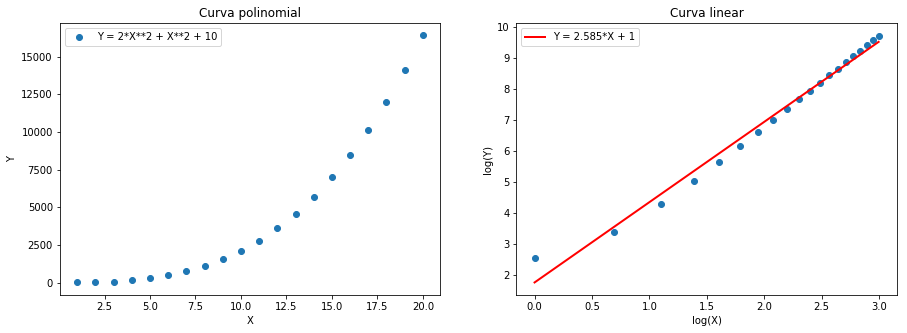

In [4]:
codigos_apresentacao.func3()

#### Agora como descobrir a curva que melhor se encaixa? Testando!

A partir das alterações nas escalas: x - y, x - log(x), y - log(x) e log(x) - log(y), e aplicando a regressão linear, é possível descobrir qual curva obteve o melhor resultado e podendo assim avaliar o nível de correlação.

Existe um probleminha: dados negativos ou nulos, com esses tipos de dados não é possível aplicar o log, então nesses casos é aplicado a raiz cubica (y**(1/3)) que possui um efeito similar ao log, mas com resultados um pouco mais fracos.

#### Como avaliar um resultado? 

Coeficiente de determinação (R2) da regressão linear, em resumo esse modelo avalia a distância total de cada ponto a reta. O coeficiente varia de 0 a 1, sendo 1 o ajuste perfeito a curva.

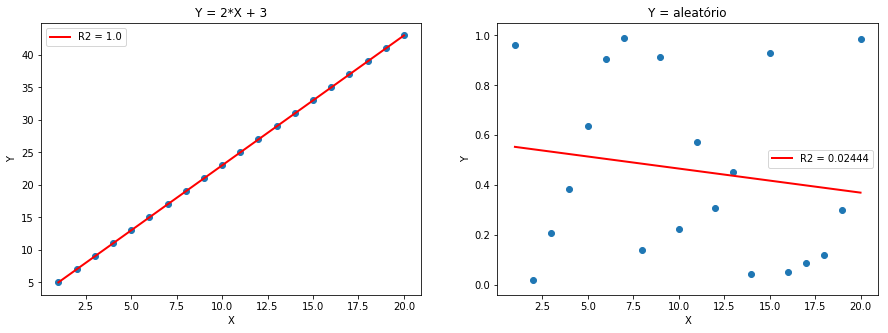

In [5]:
codigos_apresentacao.func4()

#### Outileres

Alguns pontos que podem ser casos isolados que acabam fud... atrapalhando um pouco a curva, por estarem muito distantes da reta que melhor se ajustaria aos outros pontos. Esses pontos são removidos de forma eficiente da regressão para melhor resultados. Futuramente será mostrado um caso real de outliers

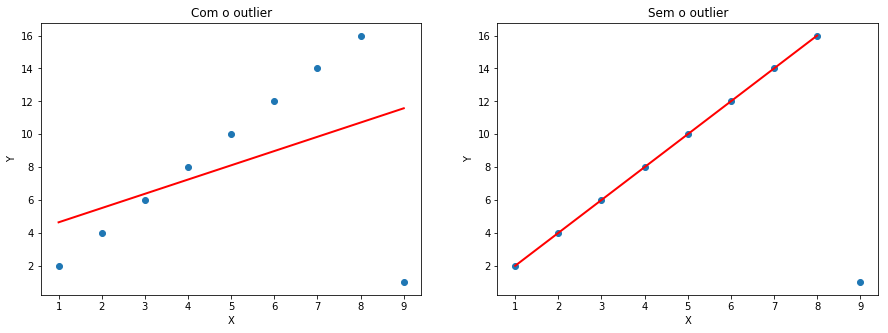

In [6]:
codigos_apresentacao.func5()

#### Conclusão:
Agora podemos medir o nivel de correlação entre dois indices a partir do coeficiente de determinação da curva que melhor se encaixa, avaliando assim se existe algum tipo de "padrão".